# Optimal Cutoff for Biased Articles - Youden Index

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

roc = {
    'cutoff':[],
    'TP':[],
    'TN':[],
    'FP':[],
    'FN':[],
    'TPR':[],
    'FPR':[],
    'TNR':[],
    'accuracy':[]
}

df = pd.read_csv('calculated-data/result.csv')
cutoff=[15,25,27,30,33,36]                                    #cutoff=[15,22,26,29,33]  these are perfect
#df.loc[(df['BiasLexicon'] < 24 ) == True]

df['Biased']=0

for j in range(len(cutoff)):
    df['Biased']=0
    for i in range(df.shape[0]):
        if df['BiasLexicon'][i] > cutoff[j]:
            df['Biased'][i]=1                                                 # means  biased
    #print(df)

    X = df[['Hedge',
            'HedgeContext',
            'FativeVerb',
            'FactiveVerbContext',
            'AssertiveVerb',
            'AssertiveVerbContext',
            'ImplicativeVerb',
            'ImplicativeVerbContext',
            'ReportVerb',
            'ReportVerbContext',
            'StrongSub',
            'StrongSubContext',
            'WeakSub',
            'WeakSubContext',
            'PositiveWord',
            'PositiveWordContext',
            'NegativeWord',
            'NegativeWordContext',
           'BiasLexicon']]
    y = df['Biased']

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

    logistic_regression= LogisticRegression()
    logistic_regression.fit(X_train,y_train)
    y_pred=logistic_regression.predict(X_test)

    confusion_matrix(y_test, y_pred)
#     TP=confusion_matrix[0][0]
#     FN=confusion_matrix[0][1]
#     FP=confusion_matrix[1][0]
#     TN=confusion_matrix[1][1]
    roc['cutoff'].append(cutoff[j])
    roc['TP'].append(confusion_matrix(y_test, y_pred)[0][0])
    roc['FN'].append(confusion_matrix(y_test, y_pred)[0][1])
    roc['FP'].append(confusion_matrix(y_test, y_pred)[1][0])
    roc['TN'].append(confusion_matrix(y_test, y_pred)[1][1])
    roc['TPR'].append(confusion_matrix(y_test, y_pred)[0][0]/(confusion_matrix(y_test, y_pred)[0][0]+confusion_matrix(y_test, y_pred)[0][1]))
    roc['FPR'].append(confusion_matrix(y_test, y_pred)[1][0]/(confusion_matrix(y_test, y_pred)[1][0]+confusion_matrix(y_test, y_pred)[1][1]))
    roc['TNR'].append(confusion_matrix(y_test, y_pred)[1][1]/(confusion_matrix(y_test, y_pred)[1][1]+confusion_matrix(y_test, y_pred)[1][0]))
    roc['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    
df_roc = pd.DataFrame(roc)
df_roc


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

,cutoff,TP,TN,FP,FN,TPR,FPR,TNR,accuracy
0,15,0,66,0,2,0.000000,0.000000,1.000000,0.970588
1,25,18,33,7,10,0.642857,0.175000,0.825000,0.750000
2,27,32,23,7,6,0.842105,0.233333,0.766667,0.808824
3,30,55,4,9,0,1.000000,0.692308,0.307692,0.867647
4,33,63,1,2,2,0.969231,0.666667,0.333333,0.941176
5,36,67,0,1,0,1.000000,1.000000,0.000000,0.985294


In [10]:
#Calculating The Youden Index

sum_column = df_roc["TPR"] + df_roc["TNR"]
df_roc["TPR+TNR-1"] = sum_column - 1
df_roc

,cutoff,TP,TN,FP,FN,TPR,FPR,TNR,accuracy,TPR+TNR-1
0,15,0,66,0,2,0.000000,0.000000,1.000000,0.970588,0.000000
1,25,18,33,7,10,0.642857,0.175000,0.825000,0.750000,0.467857
2,27,32,23,7,6,0.842105,0.233333,0.766667,0.808824,0.608772
3,30,55,4,9,0,1.000000,0.692308,0.307692,0.867647,0.307692
4,33,63,1,2,2,0.969231,0.666667,0.333333,0.941176,0.302564
5,36,67,0,1,0,1.000000,1.000000,0.000000,0.985294,0.000000


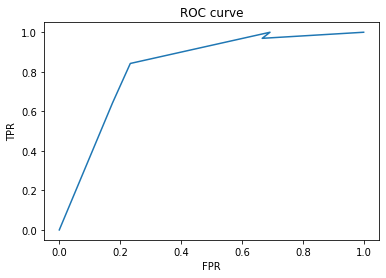

In [5]:
#Plotting The ROC Curve

import matplotlib.pyplot as plt

x = df_roc['FPR'] 
y = df_roc['TPR']
    
plt.plot(x, y) 
  
plt.xlabel('FPR')  
plt.ylabel('TPR') 
  
plt.title('ROC curve') 
  
plt.show() 

In [6]:
# checking for labels

# df=pd.read_csv('label.csv')

# for i in range(df.shape[0]):
#     if df['bjp_count'][i] > 3:
#         df['label'][i] = 'bjp'
# X = df[['Hedge',
#     'HedgeContext',
#     'FativeVerb',
#     'FactiveVerbContext',
#     'AssertiveVerb',
#     'AssertiveVerbContext',
#     'ImplicativeVerb',
#     'ImplicativeVerbContext',
#     'ReportVerb',
#     'ReportVerbContext',
#     'StrongSub',
#     'StrongSubContext',
#     'WeakSub',
#     'WeakSubContext',
#     'PositiveWord',
#     'PositiveWordContext',
#     'NegativeWord',
#     'NegativeWordContext',
#     'bjp_count',
#    'BiasLexicon']]
# y = df['label']

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# logistic_regression= LogisticRegression()
# logistic_regression.fit(X_train,y_train)
# y_pred=logistic_regression.predict(X_test)

# print(confusion_matrix(y_test, y_pred))

# Optimal Cutoff for Ruling Goverment - Youden Index 

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix


roc = {
    'cutoff':[],
    'TP':[],
    'TN':[],
    'FP':[],
    'FN':[],
    'TPR':[],
    'FPR':[],
    'TNR':[],
    'accuracy':[]
}

df = pd.read_csv('calculated-data/label1.csv')
cutoff=[1,2,4,7]
for j in range(len(cutoff)):
    df['label']='others'
    for i in range(df.shape[0]):
        if df['bjp_count'][i] > cutoff[j]:
            df['label'][i]='bjp'
    
    X = df[['Hedge',
        'HedgeContext',
        'FativeVerb',
        'FactiveVerbContext',
        'AssertiveVerb',
        'AssertiveVerbContext',
        'ImplicativeVerb',
        'ImplicativeVerbContext',
        'ReportVerb',
        'ReportVerbContext',
        'StrongSub',
        'StrongSubContext',
        'WeakSub',
        'WeakSubContext',
        'PositiveWord',
        'PositiveWordContext',
        'NegativeWord',
        'NegativeWordContext',
        'bjp_count',
       'BiasLexicon']]
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

    logistic_regression= LogisticRegression()
    logistic_regression.fit(X_train,y_train)
    y_pred=logistic_regression.predict(X_test)
    
    confusion_matrix(y_test, y_pred)
#     TP=confusion_matrix[0][0]
#     FN=confusion_matrix[0][1]
#     FP=confusion_matrix[1][0]
#     TN=confusion_matrix[1][1]
    roc['cutoff'].append(cutoff[j])
    roc['TP'].append(confusion_matrix(y_test, y_pred)[0][0])
    roc['FN'].append(confusion_matrix(y_test, y_pred)[0][1])
    roc['FP'].append(confusion_matrix(y_test, y_pred)[1][0])
    roc['TN'].append(confusion_matrix(y_test, y_pred)[1][1])
    roc['TPR'].append(confusion_matrix(y_test, y_pred)[0][0]/(confusion_matrix(y_test, y_pred)[0][0]+confusion_matrix(y_test, y_pred)[0][1]))
    roc['FPR'].append(confusion_matrix(y_test, y_pred)[1][0]/(confusion_matrix(y_test, y_pred)[1][0]+confusion_matrix(y_test, y_pred)[1][1]))
    roc['TNR'].append(confusion_matrix(y_test, y_pred)[1][1]/(confusion_matrix(y_test, y_pred)[1][1]+confusion_matrix(y_test, y_pred)[1][0]))
    roc['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    
df_roc = pd.DataFrame(roc)
df_roc

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

,cutoff,TP,TN,FP,FN,TPR,FPR,TNR,accuracy
0,1,15,2,1,1,0.9375,0.333333,0.666667,0.894737
1,2,9,7,2,1,0.9000,0.222222,0.777778,0.842105
2,4,5,13,1,0,1.0000,0.071429,0.928571,0.947368
3,7,0,18,0,1,0.0000,0.000000,1.000000,0.947368


In [12]:
sum_column = df_roc["TPR"] + df_roc["TNR"]
df_roc["TPR+TNR-1"] = sum_column - 1
df_roc

,cutoff,TP,TN,FP,FN,TPR,FPR,TNR,accuracy,TPR+TNR-1
0,1,15,2,1,1,0.9375,0.333333,0.666667,0.894737,0.604167
1,2,9,7,2,1,0.9000,0.222222,0.777778,0.842105,0.677778
2,4,5,13,1,0,1.0000,0.071429,0.928571,0.947368,0.928571
3,7,0,18,0,1,0.0000,0.000000,1.000000,0.947368,0.000000


In [10]:
import matplotlib.pyplot as plt 


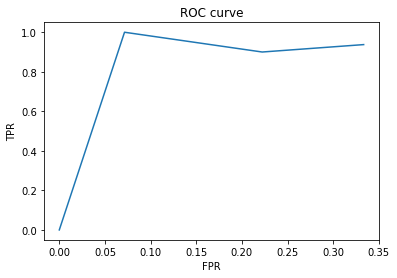

In [11]:
x = df_roc['FPR'] 
y = df_roc['TPR']
    
plt.plot(x, y) 
  
plt.xlabel('FPR')  
plt.ylabel('TPR') 
  
plt.title('ROC curve') 
  
plt.show() 

In [58]:
# testing for congress

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix


roc = {
    'cutoff':[],
    'TP':[],
    'TN':[],
    'FP':[],
    'FN':[],
    'TPR':[],
    'FPR':[],
    'TNR':[],
    'accuracy':[]
}

df = pd.read_csv('congress.csv')
cutoff=[1,2,3]
for j in range(len(cutoff)):
    df['label']='others'
    for i in range(df.shape[0]):
        if df['congress_count'][i] > cutoff[j]:
            df['label'][i]='congress'
    
    X = df[['Hedge',
        'HedgeContext',
        'FativeVerb',
        'FactiveVerbContext',
        'AssertiveVerb',
        'AssertiveVerbContext',
        'ImplicativeVerb',
        'ImplicativeVerbContext',
        'ReportVerb',
        'ReportVerbContext',
        'StrongSub',
        'StrongSubContext',
        'WeakSub',
        'WeakSubContext',
        'PositiveWord',
        'PositiveWordContext',
        'NegativeWord',
        'NegativeWordContext',
        'bjp_count',
        'congress_count',
       'BiasLexicon']]
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

    logistic_regression= LogisticRegression()
    logistic_regression.fit(X_train,y_train)
    y_pred=logistic_regression.predict(X_test)
    
    confusion_matrix(y_test, y_pred)
#     TP=confusion_matrix[0][0]
#     FN=confusion_matrix[0][1]
#     FP=confusion_matrix[1][0]
#     TN=confusion_matrix[1][1]
    roc['cutoff'].append(cutoff[j])
    roc['TP'].append(confusion_matrix(y_test, y_pred)[0][0])
    roc['FN'].append(confusion_matrix(y_test, y_pred)[0][1])
    roc['FP'].append(confusion_matrix(y_test, y_pred)[1][0])
    roc['TN'].append(confusion_matrix(y_test, y_pred)[1][1])
    roc['TPR'].append(confusion_matrix(y_test, y_pred)[0][0]/(confusion_matrix(y_test, y_pred)[0][0]+confusion_matrix(y_test, y_pred)[0][1]))
    roc['FPR'].append(confusion_matrix(y_test, y_pred)[1][0]/(confusion_matrix(y_test, y_pred)[1][0]+confusion_matrix(y_test, y_pred)[1][1]))
    roc['TNR'].append(confusion_matrix(y_test, y_pred)[1][1]/(confusion_matrix(y_test, y_pred)[1][1]+confusion_matrix(y_test, y_pred)[1][0]))
    roc['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    
df_roc = pd.DataFrame(roc)
df_roc

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

,cutoff,TP,TN,FP,FN,TPR,FPR,TNR,accuracy
0,1,9,2,1,0,1.000000,0.333333,0.666667,0.916667
1,2,6,5,1,0,1.000000,0.166667,0.833333,0.916667
2,3,2,8,1,1,0.666667,0.111111,0.888889,0.833333


In [59]:
sum_column = df_roc["TPR"] + df_roc["TNR"]
df_roc["TPR+TNR-1"] = sum_column - 1
df_roc

,cutoff,TP,TN,FP,FN,TPR,FPR,TNR,accuracy,TPR+TNR-1
0,1,9,2,1,0,1.000000,0.333333,0.666667,0.916667,0.666667
1,2,6,5,1,0,1.000000,0.166667,0.833333,0.916667,0.833333
2,3,2,8,1,1,0.666667,0.111111,0.888889,0.833333,0.555556


In [60]:
import matplotlib.pyplot as plt 

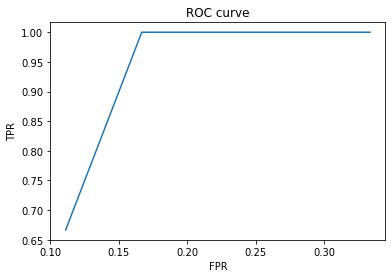

In [61]:
x = df_roc['FPR'] 
y = df_roc['TPR']
    
plt.plot(x, y) 
  
plt.xlabel('FPR')  
plt.ylabel('TPR') 
  
plt.title('ROC curve') 
  
plt.show() 

In [30]:
df=pd.read_csv('congress.csv')
for i in range(df.shape[0]):
    if df['congress_count'][i] > 2:
        df['label'][i]='congress'



X = df[['Hedge',
        'HedgeContext',
        'FativeVerb',
        'FactiveVerbContext',
        'AssertiveVerb',
        'AssertiveVerbContext',
        'ImplicativeVerb',
        'ImplicativeVerbContext',
        'ReportVerb',
        'ReportVerbContext',
        'StrongSub',
        'StrongSubContext',
        'WeakSub',
        'WeakSubContext',
        'PositiveWord',
        'PositiveWordContext',
        'NegativeWord',
        'NegativeWordContext',
        'bjp_count',
        'congress_count',
       'BiasLexicon']]
y = df['label']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
#print(metrics.roc_auc_score(y_test, y_pred))

[[6 0]
 [1 5]]
Accuracy:  0.9166666666666666
              precision    recall  f1-score   support

    congress       0.86      1.00      0.92         6
      others       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
#df.loc[(df['label'] == 'congress' ) == True]